# **Analyze and comment**

**User retention and transaction behavior (Is there any trend?) since Loyalty program launched.**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [12]:
transactions = pd.read_excel('C:\\Users\\Le Ngoc\\Desktop\\Project\\Case_ Portfolio 2\\Sample\\transactions.xlsx')

In [13]:
daily_transactions = transactions.groupby('DATE')['Order_id'].count().reset_index()
daily_transactions.head(5)

,DATE,Order_id
0,2021-01-01,17
1,2021-01-02,20
2,2021-01-03,13
3,2021-01-04,16
4,2021-01-05,15


(array([18628., 18687., 18748., 18809., 18871., 18932., 18993., 19052.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03'),
  Text(18748.0, 0, '2021-05'),
  Text(18809.0, 0, '2021-07'),
  Text(18871.0, 0, '2021-09'),
  Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03')])

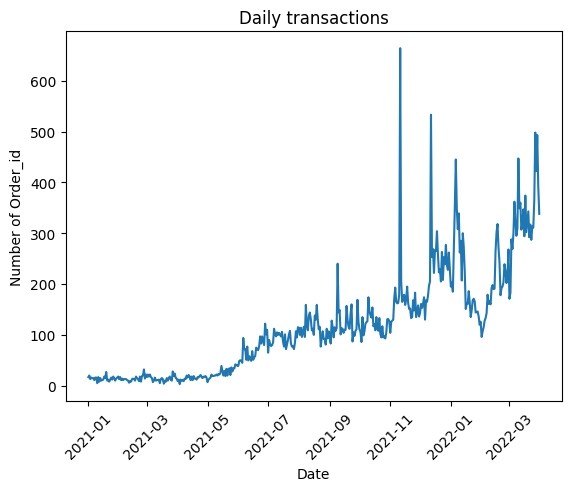

In [14]:
plt.plot(daily_transactions['DATE'],daily_transactions['Order_id'])
plt.title('Daily transactions')
plt.ylabel('Number of Order_id')
plt.xlabel('Date')
plt.xticks(rotation=45)

In [15]:
transactions['Days of week']=transactions['DATE'].dt.day_name()
transactions.head(5)

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty points,30 days accumulated loyalty points,Rank,Class ID,%cashback,cashback,weekly rentention,Days of week
0,2021-01-01,8733622706,Marketplace,37,61386143,100000,marketplace,100.0,100.0,STANDARD,1,0,0.0,0,Friday
1,2021-01-01,8726857991,Supermarket,9,48453125,5000,supermarket,5.0,5.0,STANDARD,1,0,0.0,0,Friday
2,2021-01-01,8737326894,Supermarket,9,49921027,106600,supermarket,106.6,106.6,STANDARD,1,0,0.0,0,Friday
3,2021-01-01,8732579078,supermarket,9,46022523,270000,supermarket,270.0,270.0,STANDARD,1,0,0.0,0,Friday
4,2021-01-01,8725567343,CVS,8,44014594,68000,cvs,68.0,80.0,STANDARD,1,0,0.0,0,Friday


In [16]:
daysofweek = transactions.groupby('Days of week')['Order_id'].count().reset_index()
daysofweek.head(5)

,Days of week,Order_id
0,Friday,7101
1,Monday,7181
2,Saturday,7323
3,Sunday,7729
4,Thursday,8728


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

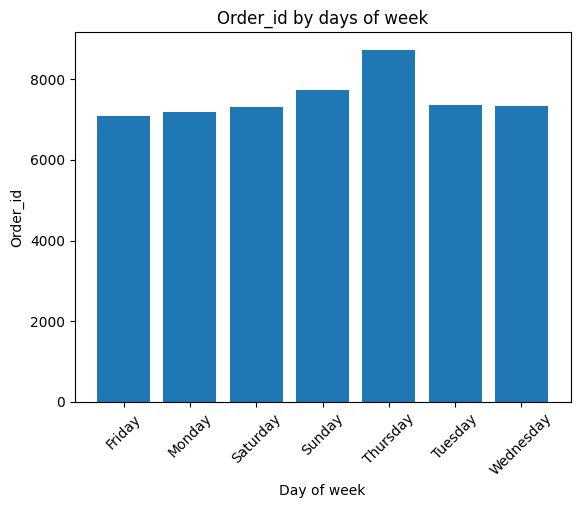

In [17]:
plt.bar(daysofweek['Days of week'],daysofweek['Order_id'])
plt.title('Order_id by days of week')
plt.xlabel('Day of week')
plt.ylabel('Order_id')
plt.xticks(rotation=45)

In [18]:
daysofweek_ = transactions.groupby('Days of week')['weekly rentention'].sum().reset_index()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

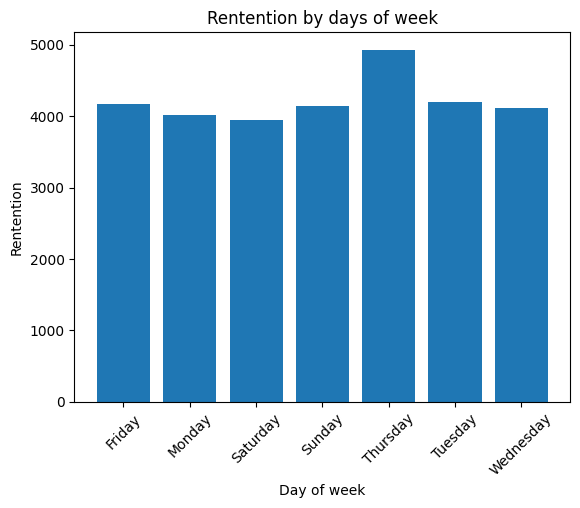

In [19]:
plt.bar(daysofweek_['Days of week'],daysofweek_['weekly rentention'])
plt.title('Rentention by days of week')
plt.xlabel('Day of week')
plt.ylabel('Rentention')
plt.xticks(rotation=45)

The company has seen a notable boost in orders since applying for the loyalty program. The number of orders peaked at about 600 orders in November 2022. Following that, the trend of orders increased, with the total amount placed being around twice as high as it was before. Moreover, the highest transaction and retention rates occur on Thursdays.

# **Question 2**

**Momo is facing increasing amount of cashback cost as well as  GMV since launched. However, we want to optimize the cost but still want to keep growth of GMV and increase the retention rate.**

In [20]:
service= transactions.groupby('Service Group').agg({'GMV':'sum','cashback':'sum'}).reset_index()
service=service.set_index('Service Group')
service.head(5)

,GMV,cashback
Service Group,,
Coffee chains and Milk tea,154917495,0.00
Offline Beverage,1883000,39550.00
cvs,1882831446,17810535.49
data,353137800,10056645.00
marketplace,3925019072,23505543.92


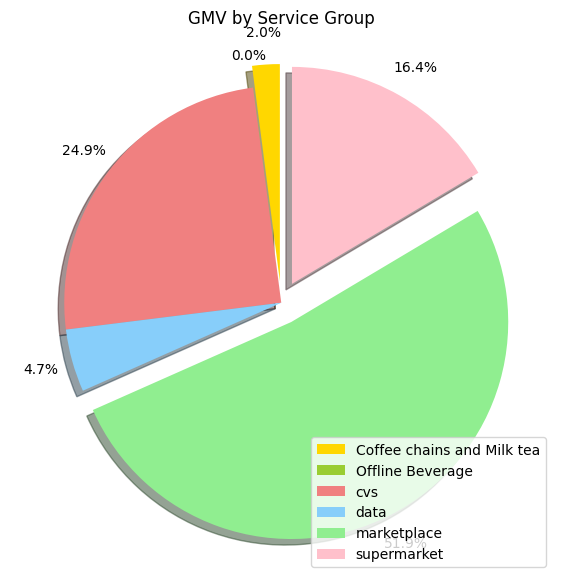

In [21]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 

plt.figure(figsize=(7,10))  # Set the figure size here

plt.pie(service['GMV'], labels=None, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=1.15,
        colors=colors_list,
        explode=explode_list)

plt.title('GMV by Service Group')
plt.legend(labels=service.index, loc='lower right')

plt.show()

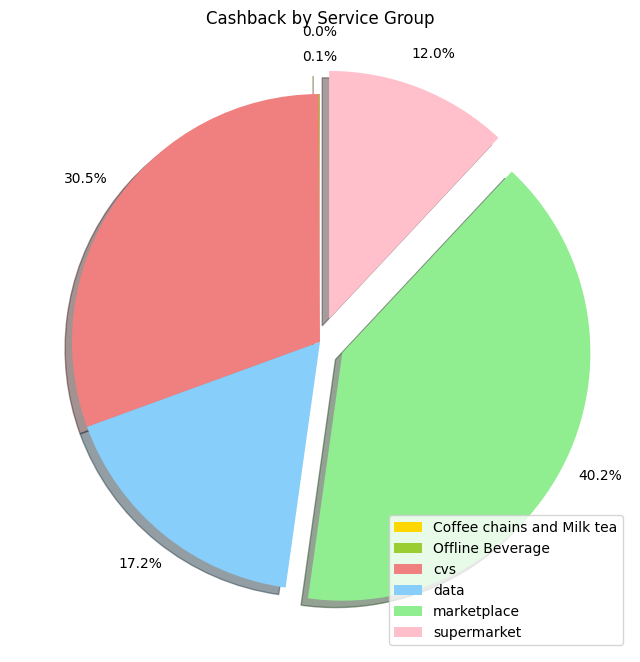

In [22]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] 

plt.figure(figsize=(8,10))  # Set the figure size here

plt.pie(service['cashback'], labels=None, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=1.15,
        colors=colors_list,
        explode=explode_list)

plt.title('Cashback by Service Group')
plt.legend(labels=service.index, loc='lower right')

# Display the plot
plt.show()

In [23]:
distinct_count = transactions['Order_id'].nunique()
distinct_count

49175

In [24]:
total = transactions.groupby(['Service Group','Class ID']).agg({'GMV':'sum','cashback':'sum','Order_id':'nunique'})
total['Ratio']=total['cashback']/total['GMV']
total

GMV     cashback  Order_id  \
Service Group              Class ID                                      
Coffee chains and Milk tea 1          100507797         0.00      1495   
                           2           27495541         0.00       301   
                           3           19412384         0.00       235   
                           4            7501773         0.00        81   
Offline Beverage           1            1092000         0.00        19   
                           2             791000     39550.00        14   
cvs                        1          882132952         0.00      6847   
                           2          364966305   6994776.55      1759   
                           3          412314947   6457499.42      1251   
                           4          223417242   4358259.52       478   
data                       1          187249100         0.00     11307   
                           2           93582200   4671360.00      2869   
                           3           60153500   4131245.00      1655   
                           4           12153000   1254040.00       259   
marketplace                1         1520711960         0.00      9709   
                           2          990211416         0.00      2867   
                           3          738627008  11220646.02      2100   
                           4          675468688  12284897.90      1202   
supermarket                1          538182798         0.00      2701   
                           2          329293045         0.00      1002   
                           3          228023150   3418330.70       607   
                           4          148119888   3569906.70       417   

                                        Ratio  
Service Group              Class ID            
Coffee chains and Milk tea 1         0.000000  
                           2         0.000000  
                           3         0.000000  
                           4         0.000000  
Offline Beverage           1         0.000000  
                           2         0.050000  
cvs                        1         0.000000  
                           2         0.019166  
                           3         0.015662  
                           4         0.019507  
data                       1         0.000000  
                           2         0.049917  
                           3         0.068678  
                           4         0.103188  
marketplace                1         0.000000  
                           2         0.000000  
                           3         0.015191  
                           4         0.018187  
supermarket                1         0.000000  
                           2         0.000000  
                           3         0.014991  
                           4         0.024101

# **Question 3**

**Gamification is usually a sensible option for apps to raise users’ stickiness. In our loyalty program development strategy, we also plan to hold a small game for users. The rule is simple: any users who can maintain a 20-day or longer streak of being in the DIAMOND ranking is a winner (in other words, winners are users who have total loyalty points greater than or equal to 5,000 for at least 20 consecutive days). We also want to give a special reward for the user(s) who can maintain the longest streak. Could you help us to calculate how many winners were there during the last thirty days in the given data (March 01 - March 31) and who was/were the one(s) boasting the longest streak during that time?**

In [26]:
mar = transactions[(transactions['DATE']>'2022-03-01')&(transactions['DATE']<'2022-03-31')&(transactions['Rank']=='DIAMOND')]
mar.head(5)

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty points,30 days accumulated loyalty points,Rank,Class ID,%cashback,cashback,weekly rentention,Days of week
42722,2022-03-02,21543303436,Marketplace,24,47662326,3238000,marketplace,500.0,24085.726,DIAMOND,4,5,10000.0,1,Wednesday
42826,2022-03-03,21579072703,Marketplace,37,57207697,980000,marketplace,500.0,7835.400,DIAMOND,4,5,10000.0,1,Thursday
42827,2022-03-03,21591742656,Marketplace,37,57207697,288000,marketplace,288.0,7835.400,DIAMOND,4,5,10000.0,1,Thursday
42829,2022-03-03,21591031164,Marketplace,37,57207697,192000,marketplace,192.0,7835.400,DIAMOND,4,5,9600.0,1,Thursday
42856,2022-03-03,21591031164,Marketplace,37,57207697,192000,marketplace,192.0,7835.400,DIAMOND,4,5,9600.0,1,Thursday


In [27]:
distinct_count = mar['User_id'].nunique()
distinct_count

21

In [28]:
df_no_duplicates = mar.drop_duplicates(subset=['DATE', 'User_id']).reset_index(drop=True)
df_no_duplicates.head(5)

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty points,30 days accumulated loyalty points,Rank,Class ID,%cashback,cashback,weekly rentention,Days of week
0,2022-03-02,21543303436,Marketplace,24,47662326,3238000,marketplace,500.0,24085.726,DIAMOND,4,5,10000.0,1,Wednesday
1,2022-03-03,21579072703,Marketplace,37,57207697,980000,marketplace,500.0,7835.400,DIAMOND,4,5,10000.0,1,Thursday
2,2022-03-03,21588738739,Marketplace,24,47662326,263400,marketplace,263.4,26185.904,DIAMOND,4,5,10000.0,1,Thursday
3,2022-03-03,21590625942,Marketplace,24,39314846,338100,marketplace,338.1,6910.720,DIAMOND,4,5,10000.0,1,Thursday
4,2022-03-03,21575028077,CVS,8,55200938,120000,cvs,120.0,6538.154,DIAMOND,4,12,10000.0,1,Thursday


In [29]:
date_diff = mar.groupby('User_id')['DATE'].agg(lambda x: (x.max() - x.min()).days).reset_index()
date_diff.head(5)

,User_id,DATE
0,12229364,0
1,25993024,4
2,31244414,0
3,36884902,20
4,39314846,27


In [30]:
winnerstreak = date_diff[date_diff['DATE']>=20]
winnerstreak

,User_id,DATE
3,36884902,20
4,39314846,27
12,47662326,27
14,50185392,22
15,51432947,25
18,55200938,27
20,57207697,27


In [31]:
sorted= date_diff.sort_values(by='DATE',ascending=False)
sorted.head(5)

,User_id,DATE
20,57207697,27
4,39314846,27
18,55200938,27
12,47662326,27
15,51432947,25
